<a href="https://colab.research.google.com/github/sharvani1357/Exploratory-Data-Analysis./blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Real Estate Market Insights
Task 1 — Load & Inspect the Dataset
Load the dataset into your notebook
Display the first 5 and last 5 rows of the dataset.
Print the dataset shape (rows, columns).
Print dataset information using .info().
Identify basic data types of all columns.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [ ]:
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (13320, 9)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.dtypes


,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


Task 2 — Clean the Dataset
Identify and count missing values in each column.
Drop column(s) that are irrelevant for price analysis (example: society or unnamed columns).
Handle missing values in numeric columns such as bath, balcony, etc. (use either dropna() or fillna() depending on your reasoning).
Convert total_sqft to numeric — handle values like "2100 - 2850" by converting them to an average or a single number.
Remove duplicate rows.
6. Reset the DataFrame index after cleaning

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
cols_to_drop = ['society']
for col in cols_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)
df.head()



,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
num_cols = ['bath', 'balcony']

for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())



In [ ]:
def convert_sqft(value):
    try:
        if '-' in value:
            low, high = value.split('-')
            return (float(low) + float(high)) / 2
        return float(value)

    except:
        return None

In [ ]:
df['total_sqft'] = df['total_sqft'].astype(str).apply(convert_sqft)


In [ ]:
df = df.dropna(subset=['total_sqft'])


In [ ]:
df = df.drop_duplicates()


In [ ]:
df = df.reset_index(drop=True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


Task 3 — Data Analysis

How many unique locations are present in the dataset?
What is the average house price for each location?
Which location has the highest average price?
What is the correlation between:
total_sqft
bath
price
Interpret whether larger houses always have higher prices based on your observations.

In [ ]:
#1.
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
df['location'].nunique()


1259

In [ ]:
#2.
avg_price_location = df.groupby('location')['price'].mean().sort_values(ascending=False)
avg_price_location

,price
location,
Ashok Nagar,1486.000
Church Street,1068.000
D Souza Layout,1015.000
Sadashiva Nagar,945.125
Srinivas Colony,922.000
...,...
Celebrity Paradise Layout,19.245
BAGUR,17.000
Makali,16.000


In [ ]:
#3.
avg_price_location.head(1)

,price
location,
Ashok Nagar,1486.0


In [ ]:
#4.
df[['total_sqft','bath','price']].corr()

,total_sqft,bath,price
total_sqft,1.000000,0.390779,0.556720
bath,0.390779,1.000000,0.455601
price,0.556720,0.455601,1.000000


In [ ]:
corr = df[['total_sqft','bath','price']].corr() # Define corr here
corr_sqft_price = corr.loc['total_sqft', 'price']
print("\n5) Interpretation:")

if corr_sqft_price > 0.7:
    print("• Strong positive correlation → Larger houses generally have higher prices.")
elif corr_sqft_price > 0.4:
    print("• Moderate correlation → Larger houses often cost more, but not always.")
else:
    print("• Weak correlation → Size alone does NOT determine price.")


5) Interpretation:
• Moderate correlation → Larger houses often cost more, but not always.


5.The correlation between total_sqft and price is around 0.56, which shows a moderate positive relationship.
This means larger houses generally have higher prices, but it is not guaranteed.
Some big houses may be cheaper due to poor location or other factors, and some small houses may be expensive due to prime location.
So, larger houses do not always have higher prices, but there is a clear upward trend.

Task 4 — Data Visualization
Use the specific visualization types mentioned for each question.
Price Distribution:
Plot the distribution of the price column using a Histogram + KDE curve.
Relationship Between Area and Price:
Visualize the relationship between total_sqft and price using a Scatter Plot.
Effect of Bathrooms on Price:
Show how bath count affects house prices using a Box Plot.
Top 10 Most Expensive Locations:
Plot the Top 10 locations with highest average price using a Bar Chart.
Correlation Between Numeric Columns:
Create a Heatmap to visualize correlations among numeric features (price, total_sqft, bath, balcony, etc.).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


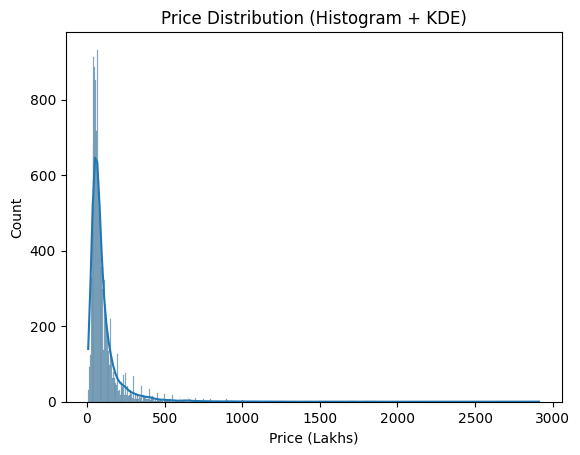

In [ ]:

sns.histplot(df['price'], kde=True)
plt.title("Price Distribution (Histogram + KDE)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()


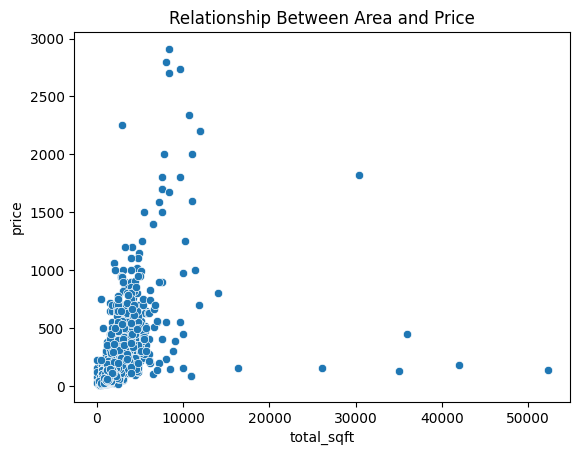

In [ ]:
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title("Relationship Between Area and Price")
plt.xlabel("total_sqft")
plt.ylabel("price")
plt.show()

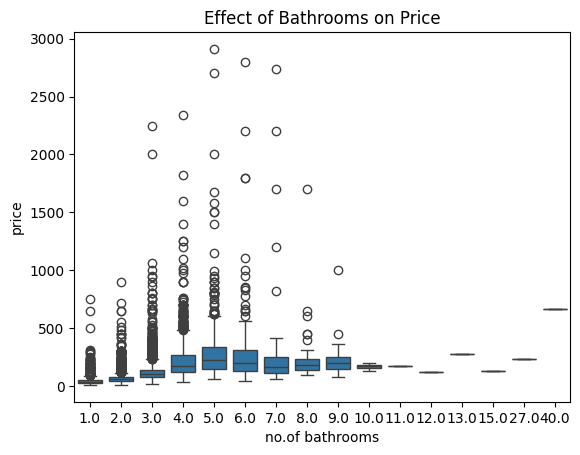

In [ ]:
sns.boxplot(x=df['bath'],y=df['price'])
plt.title("Effect of Bathrooms on Price")
plt.xlabel("no.of bathrooms")
plt.ylabel("price")
plt.show()


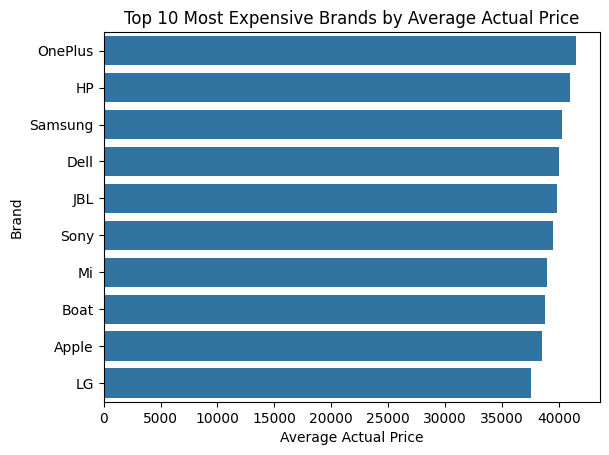

In [ ]:
top10_brands_by_price = df.groupby('brand')['actual_price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top10_brands_by_price.values, y=top10_brands_by_price.index)
plt.title("Top 10 Most Expensive Brands by Average Actual Price")
plt.xlabel("Average Actual Price")
plt.ylabel("Brand")
plt.show()

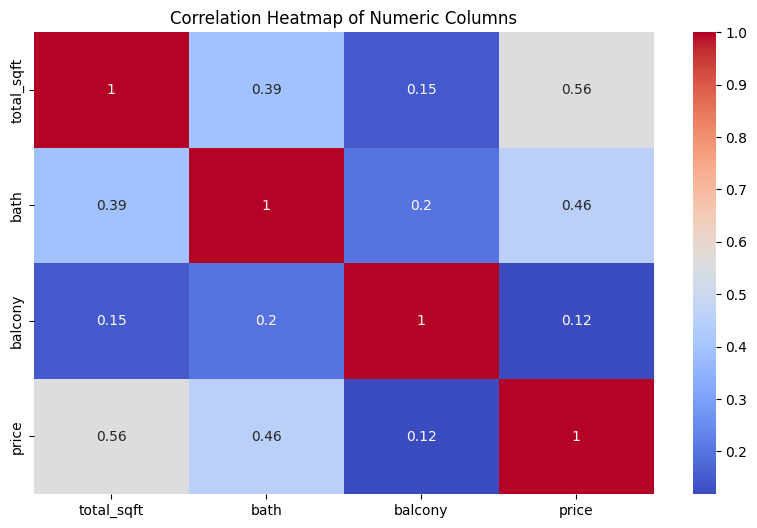

In [ ]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [ ]:

df.to_csv("cleaned_house_price_data.csv", index=False)

In [ ]:
from google.colab import files
files.download("cleaned_house_price_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
verify_df = pd.read_csv("cleaned_house_price_data.csv")
verify_df.head()


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


Assignment 2

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/amazon_products_dataset.csv")
df.head()


,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [ ]:
df.head()


,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [ ]:
df.tail()

,title,brand,category,actual_price,discount_price,rating,rating_count
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0
1999,Smartphone with AMOLED Display,Boat,Headphones,31662.0,31047.0,3.2,1064.0


In [ ]:
df.shape

(2000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [ ]:
df.columns

Index(['title', 'brand', 'category', 'actual_price', 'discount_price',
       'rating', 'rating_count'],
      dtype='object')

In [ ]:
df['category'].unique()


array(['Laptop', 'Smartwatch', 'Headphones', 'Camera', 'Monitor',
       'Speaker', 'Tablet', 'Smartphone', nan], dtype=object)

In [ ]:
df['category'].nunique()


8

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
rating_count,4
rating,4
category,2
actual_price,2
discount_price,1
brand,0
title,0


In [ ]:
df.dtypes

,0
title,object
brand,object
category,object
actual_price,float64
discount_price,float64
rating,float64
rating_count,float64


In [ ]:
df.sample(10)

,title,brand,category,actual_price,discount_price,rating,rating_count
302,Wireless Bluetooth Headphones,Apple,Speaker,28391.0,23793.0,1.1,11785.0
884,Gaming Laptop,OnePlus,Smartwatch,70756.0,66562.0,1.1,3255.0
1100,Smart Fitness Watch,Boat,Camera,78209.0,73593.0,4.9,10248.0
6,Smartphone with AMOLED Display,OnePlus,Laptop,10026.0,5451.0,3.4,18262.0
1126,Noise Cancelling Earbuds,Sony,Tablet,55157.0,53543.0,3.5,14385.0
304,Smartphone with AMOLED Display,Sony,Tablet,18910.0,18333.0,4.0,6260.0
337,Android Tablet,Sony,Laptop,46060.0,42058.0,3.4,11217.0
897,High Resolution Monitor,Samsung,Speaker,61907.0,60891.0,4.2,17309.0
1695,Smartphone with AMOLED Display,Dell,Headphones,65222.0,65055.0,4.7,8509.0
1960,Wireless Bluetooth Headphones,Apple,Monitor,59773.0,57038.0,1.8,12906.0


Task2

In [ ]:
df.isnull().sum()


,0
title,0
brand,0
category,2
actual_price,2
discount_price,1
rating,4
rating_count,4


In [ ]:

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df.columns)


Index(['title', 'brand', 'category', 'actual_price', 'discount_price',
       'rating', 'rating_count'],
      dtype='object')


In [ ]:

if 'brand' in df.columns:
    df['brand'] = df['brand'].fillna("Unknown")

if 'category' in df.columns:
    df['category'] = df['category'].fillna("Unknown")


In [ ]:
df = df.drop_duplicates()


In [ ]:
df['actual_price'] = (
    df['actual_price']
    .astype(str)
    .str.replace(r'[₹$,]', '', regex=True)
)

df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')


In [ ]:
df['discount_price'] = (
    df['discount_price']
    .astype(str)
    .str.replace(r'[₹$,]', '', regex=True)
)

df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')

In [ ]:
df['discount_percentage'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

In [ ]:
df['rating_count'] = (
    df['rating_count']
    .astype(str)
    .str.replace(',', '', regex=False)
)

df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


In [ ]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percentage,discount_percent,price_category,popularity_score,revenue_potential
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,6.608957,Premium,19.924860,1.487259e+08
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,4.184451,Premium,22.795289,6.088180e+08
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,8.988944,Premium,14.879318,1.097362e+08
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,7.145786,Premium,36.156019,1.111732e+09
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,8.546644,Premium,46.858883,7.003591e+08


In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [ ]:
df = df.reset_index(drop=True)


Task3

In [ ]:


# 1. Top 5 most expensive products
print("Top 5 Most Expensive Products:\n")
top5_expensive = df.nlargest(5, 'actual_price')
display(top5_expensive[['title', 'brand', 'actual_price']])

# 2. Brand with highest number of products
print("\nBrand with the highest number of products:\n")
brand_counts = df['brand'].value_counts()
display(brand_counts.head(10))
print("Top brand:", brand_counts.idxmax(), "| Total products:", brand_counts.max())

# 3. Average discount percentage for each brand
print("\nAverage Discount Percentage per Brand:\n")
avg_discount_brand = df.groupby('brand')['discount_percentage'].mean().sort_values(ascending=False)
display(avg_discount_brand.head(20))

# 4. Products with rating ≥ 4.5 and rating_count ≥ 2000
print("\nProducts with rating ≥ 4.5 and rating_count ≥ 2000:\n")
high_rated = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]

display(high_rated[['title', 'brand', 'rating', 'rating_count', 'actual_price']].head(20))
print("Total products meeting criteria:", len(high_rated))

# 5. Category-wise average price
print("\nCategory-wise Average Price:\n")
category_avg_price = df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
display(category_avg_price)



Top 5 Most Expensive Products:



,title,brand,actual_price
1383,Android Tablet,JBL,79993.0
1974,Gaming Laptop,LG,79869.0
1403,4K Action Camera,Sony,79857.0
1351,Android Tablet,Sony,79853.0
42,Gaming Laptop,Apple,79826.0



Brand with the highest number of products:



,count
brand,
Boat,214
LG,208
Sony,208
JBL,207
HP,206
Samsung,205
OnePlus,204
Apple,190
Mi,181


Top brand: Boat | Total products: 214

Average Discount Percentage per Brand:



,discount_percentage
brand,
Apple,12.721996
Boat,12.546502
LG,11.559797
HP,11.501202
OnePlus,11.380987
JBL,11.370137
Dell,11.165004
Sony,10.816592
Samsung,10.805965



Products with rating ≥ 4.5 and rating_count ≥ 2000:



,title,brand,rating,rating_count,actual_price
4,Smart Fitness Watch,Samsung,4.9,14228.0,49224.0
32,4K Action Camera,OnePlus,4.6,5066.0,7793.0
51,Wireless Bluetooth Headphones,Dell,4.5,13402.0,61569.0
52,Laptop with SSD Storage,Boat,5.0,7433.0,76286.0
59,Gaming Laptop,Samsung,4.7,4643.0,45250.0
69,Android Tablet,OnePlus,4.5,11588.0,28921.0
75,Gaming Laptop,LG,4.5,13284.0,71532.0
84,High Resolution Monitor,Apple,4.8,6406.0,73669.0
102,Smart Fitness Watch,Mi,4.8,9981.0,40775.0
106,Smartphone with AMOLED Display,LG,4.7,13697.0,46846.0


Total products meeting criteria: 218

Category-wise Average Price:



,actual_price
category,
Laptop,40822.874477
Camera,40352.246094
Monitor,39950.747212
Tablet,39943.815217
Speaker,39683.795276
Headphones,39576.147679
Smartwatch,38316.913934
Smartphone,37909.529412
Unknown,33610.500000


Task 4

In [ ]:

import numpy as np

# Detect likely discount column name
discount_col_candidates = ['discount_price', 'discounted_price', 'discountedPrice', 'discount_price_in_rupees']
discount_col = next((c for c in discount_col_candidates if c in df.columns), None)

# Print detected columns
print("Detected price columns (existing):")
print(" actual_price in columns?:", 'actual_price' in df.columns)
print(" discount column used:", discount_col)

# Ensure numeric types
for col in ['actual_price', discount_col, 'rating', 'rating_count']:
    if col and col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create discount_percent safely (avoid division by zero)
if 'actual_price' in df.columns and discount_col:
    # If actual_price is 0 or NaN, result will be NaN
    df['discount_percent'] = np.where(
        df['actual_price'] > 0,
        ((df['actual_price'] - df[discount_col]) / df['actual_price']) * 100,
        np.nan
    )
else:
    df['discount_percent'] = np.nan
    print("discount_percent set to NaN because required columns missing.")

# Create price_category
def price_cat(p):
    try:
        if p < 500:
            return "Budget"
        if 500 <= p < 2000:
            return "Midrange"
        return "Premium"
    except:
        return np.nan

if 'actual_price' in df.columns:
    df['price_category'] = df['actual_price'].apply(price_cat)
else:
    df['price_category'] = np.nan
    print("price_category set to NaN because 'actual_price' missing.")

# Use log1p for numerical stability (log1p(x) = log(x+1))
if 'rating' in df.columns and 'rating_count' in df.columns:
    # fillna with 0 for popularity calc to avoid NaN propagation (but keep original data)
    rc = df['rating_count'].fillna(0).astype(float)
    r = df['rating'].fillna(0).astype(float)
    df['popularity_score'] = r * np.log1p(rc)
else:
    df['popularity_score'] = np.nan
    print("popularity_score set to NaN because 'rating' or 'rating_count' missing.")

# Show created columns sample
display(df[['actual_price', discount_col, 'discount_percent', 'price_category', 'rating', 'rating_count', 'popularity_score']].head(8))
print("Task 4A done: new columns 'discount_percent', 'price_category', 'popularity_score' created.")


Detected price columns (existing):
 actual_price in columns?: True
 discount column used: discount_price


,actual_price,discount_price,discount_percent,price_category,rating,rating_count,popularity_score
0,69890.0,65271.0,6.608957,Premium,2.6,2128.0,19.924860
1,66771.0,63977.0,4.184451,Premium,2.5,9118.0,22.795289
2,43598.0,39679.0,8.988944,Premium,1.9,2517.0,14.879318
3,63408.0,58877.0,7.145786,Premium,3.7,17533.0,36.156019
4,49224.0,45017.0,8.546644,Premium,4.9,14228.0,46.858883
5,17009.0,12349.0,27.397260,Premium,1.7,14179.0,16.251299
6,10026.0,5451.0,45.631358,Premium,3.4,18262.0,33.362950
7,61124.0,56399.0,7.730188,Premium,2.7,9675.0,24.778990


Task 4A done: new columns 'discount_percent', 'price_category', 'popularity_score' created.


In [ ]:
# Safety: ensure columns exist
required = ['popularity_score', 'price_category', 'discount_percent', 'title', 'rating']
missing = [c for c in required if c not in df.columns]
if missing:
    print("Warning: the following required cols are missing for some filters:", missing)

# 1) Top 10 highest popularity_score products
print("Top 10 products by popularity_score:")
top10_pop = df.nlargest(10, 'popularity_score')[['title', 'brand', 'popularity_score', 'rating', 'rating_count', 'actual_price']]
display(top10_pop)

# 2) All Premium category items with discount_percent > 40%
print("\nPremium items with discount_percent > 40%:")
premium_heavy_discount = df[(df['price_category'] == 'Premium') & (df['discount_percent'] > 40)]
display(premium_heavy_discount[['title','brand','actual_price','discount_percent','price_category']].head(50))
print("Count:", len(premium_heavy_discount))

# 3) All products whose title contains 'Bluetooth' (case-insensitive)
if 'title' in df.columns:
    print("\nProducts with 'Bluetooth' in title:")
    bluetooth_mask = df['title'].astype(str).str.contains('Bluetooth', case=False, na=False)
    bluetooth_df = df[bluetooth_mask]
    display(bluetooth_df[['title','brand','actual_price','rating']].head(100))
    print("Count:", bluetooth_mask.sum())
else:
    print("\nNo 'title' column found to filter for 'Bluetooth'.")

# 4) Products where:
#    rating >= 4.0
#    discount_percent between 20% and 50%
#    popularity_score in the top 30% percentile
print("\nProducts meeting combined criteria:")

# Calculate 70th percentile threshold for top 30%
if 'popularity_score' in df.columns:
    threshold = df['popularity_score'].quantile(0.70)
    print("popularity_score 70th percentile threshold:", threshold)
else:
    threshold = np.nan
    print("popularity_score column missing; can't compute percentile threshold.")

combined_mask = (
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50, inclusive='both')) &
    (df['popularity_score'] >= threshold)
)

combined_df = df[combined_mask]
display(combined_df[['title','brand','rating','discount_percent','popularity_score','actual_price']].head(100))
print("Total products meeting combined criteria:", len(combined_df))


Top 10 products by popularity_score:


,title,brand,popularity_score,rating,rating_count,actual_price
1418,Smartphone with AMOLED Display,OnePlus,49.130602,5.0,18510.0,22786.0
297,Portable Bluetooth Speaker,Samsung,48.928304,5.0,17776.0,52713.0
502,Wireless Bluetooth Headphones,Samsung,48.625690,5.0,16732.0,17858.0
1400,High Resolution Monitor,Dell,48.388891,5.0,15958.0,11025.0
878,Laptop with SSD Storage,Apple,48.248857,4.9,18895.0,4436.0
1489,High Resolution Monitor,Apple,48.240292,4.9,18862.0,21711.0
848,High Resolution Monitor,HP,48.157775,4.9,18547.0,11660.0
854,Portable Bluetooth Speaker,Samsung,48.040676,4.9,18109.0,19284.0
1625,Gaming Laptop,Dell,47.848110,5.0,14322.0,15099.0
637,4K Action Camera,Dell,47.803700,4.9,17254.0,35058.0



Premium items with discount_percent > 40%:


,title,brand,actual_price,discount_percent,price_category
6,Smartphone with AMOLED Display,OnePlus,10026.0,45.631358,Premium
20,4K Action Camera,OnePlus,4378.0,97.647328,Premium
53,Noise Cancelling Earbuds,JBL,2335.0,42.698073,Premium
74,High Resolution Monitor,Boat,5137.0,91.434690,Premium
104,High Resolution Monitor,Sony,4933.0,76.768701,Premium
145,Wireless Bluetooth Headphones,JBL,9421.0,52.520964,Premium
155,4K Action Camera,LG,9247.0,51.476154,Premium
165,Wireless Bluetooth Headphones,Apple,7654.0,44.656389,Premium
186,4K Action Camera,Boat,6833.0,55.392946,Premium
188,Portable Bluetooth Speaker,LG,10227.0,48.684854,Premium


Count: 81

Products with 'Bluetooth' in title:


,title,brand,actual_price,rating
14,Portable Bluetooth Speaker,OnePlus,25516.0,1.7
18,Portable Bluetooth Speaker,Sony,73590.0,3.8
21,Wireless Bluetooth Headphones,Samsung,78689.0,2.9
23,Portable Bluetooth Speaker,HP,4342.0,1.4
25,Wireless Bluetooth Headphones,Boat,14689.0,3.7
...,...,...,...,...
452,Wireless Bluetooth Headphones,Sony,6491.0,2.7
453,Wireless Bluetooth Headphones,Sony,66837.0,2.6
461,Wireless Bluetooth Headphones,Boat,67027.0,2.3
486,Wireless Bluetooth Headphones,Apple,12072.0,2.6


Count: 415

Products meeting combined criteria:
popularity_score 70th percentile threshold: 32.757478239179804


,title,brand,rating,discount_percent,popularity_score,actual_price
32,4K Action Camera,OnePlus,4.6,23.610933,39.240319,7793.0
94,Smart Fitness Watch,HP,4.4,21.689484,43.530902,16289.0
107,High Resolution Monitor,JBL,4.3,34.469075,42.375962,7308.0
140,Gaming Laptop,Sony,5.0,26.733507,40.235948,11869.0
162,Android Tablet,Apple,4.6,31.255244,44.120959,11918.0
165,Wireless Bluetooth Headphones,Apple,4.3,44.656389,41.437328,7654.0
188,Portable Bluetooth Speaker,LG,4.4,48.684854,43.450614,10227.0
215,Wireless Bluetooth Headphones,Apple,4.9,28.626520,46.636622,16855.0
274,Smartphone with AMOLED Display,Sony,4.9,21.979321,47.197155,6770.0
404,Portable Bluetooth Speaker,Samsung,4.4,24.355722,42.175826,14978.0


Total products meeting combined criteria: 54


In [ ]:


# 1) Average discount_percent for each brand
if 'brand' in df.columns and 'discount_percent' in df.columns:
    brand_avg_discount = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
    print("Average discount_percent per brand (top 20):")
    display(brand_avg_discount.head(20))
else:
    print("Required columns for brand avg discount missing.")

# 2) Average popularity_score for each price_category
if 'price_category' in df.columns and 'popularity_score' in df.columns:
    cat_popularity = df.groupby('price_category')['popularity_score'].mean().sort_values(ascending=False)
    print("\nAverage popularity_score per price_category:")
    display(cat_popularity)
else:
    print("Required columns for category popularity missing.")

# 3) Identify which category offers the highest average discount
if 'category' in df.columns and 'discount_percent' in df.columns:
    cat_avg_discount = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)
    print("\nCategory average discount (top 10):")
    display(cat_avg_discount.head(10))
    top_cat = cat_avg_discount.idxmax()
    print("Category with highest average discount:", top_cat, "->", cat_avg_discount.max())
else:
    print("Required columns for category average discount missing.")

# 4) Calculate total revenue potential per brand:
#    revenue_potential = actual_price * rating_count
if 'brand' in df.columns and 'actual_price' in df.columns and 'rating_count' in df.columns:
    df['revenue_potential'] = df['actual_price'] * df['rating_count'].fillna(0)
    revenue_by_brand = df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
    print("\nTop 20 brands by total revenue potential:")
    display(revenue_by_brand.head(20))
else:
    print("Required columns for revenue potential missing.")

# Show sample of revenue_potential column
if 'revenue_potential' in df.columns:
    display(df[['title','brand','actual_price','rating_count','revenue_potential']].sort_values('revenue_potential', ascending=False).head(10))


Average discount_percent per brand (top 20):


,discount_percent
brand,
Apple,12.721996
Boat,12.546502
LG,11.559797
HP,11.501202
OnePlus,11.380987
JBL,11.370137
Dell,11.165004
Sony,10.816592
Samsung,10.805965



Average popularity_score per price_category:


,popularity_score
price_category,
Budget,38.147220
Premium,26.268364
Midrange,23.660324



Category average discount (top 10):


,discount_percent
category,
Headphones,12.602766
Smartwatch,12.028735
Unknown,11.720852
Monitor,11.553063
Smartphone,11.516450
Tablet,11.366701
Laptop,11.207555
Camera,10.619470
Speaker,10.541600


Category with highest average discount: Headphones -> 12.602765991308125

Top 20 brands by total revenue potential:


,revenue_potential
brand,
HP,8.297444e+10
OnePlus,8.247380e+10
Samsung,8.117230e+10
LG,7.992613e+10
Sony,7.868645e+10
JBL,7.723438e+10
Mi,7.698029e+10
Boat,7.695298e+10
Dell,7.549826e+10


,title,brand,actual_price,rating_count,revenue_potential
1362,High Resolution Monitor,LG,79275.0,19355.0,1.534368e+09
1828,High Resolution Monitor,LG,78228.0,19414.0,1.518718e+09
1815,Portable Bluetooth Speaker,JBL,79229.0,19101.0,1.513353e+09
1871,Smart Fitness Watch,OnePlus,76530.0,19561.0,1.497003e+09
1395,Gaming Laptop,OnePlus,79680.0,18454.0,1.470415e+09
253,High Resolution Monitor,OnePlus,74062.0,19830.0,1.468649e+09
189,Smart Fitness Watch,Mi,77763.0,18590.0,1.445614e+09
962,4K Action Camera,Samsung,73203.0,19416.0,1.421309e+09
978,High Resolution Monitor,HP,71391.0,19890.0,1.419967e+09
846,4K Action Camera,JBL,72935.0,19280.0,1.406187e+09


In [ ]:
Task5 : Data Visualization

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




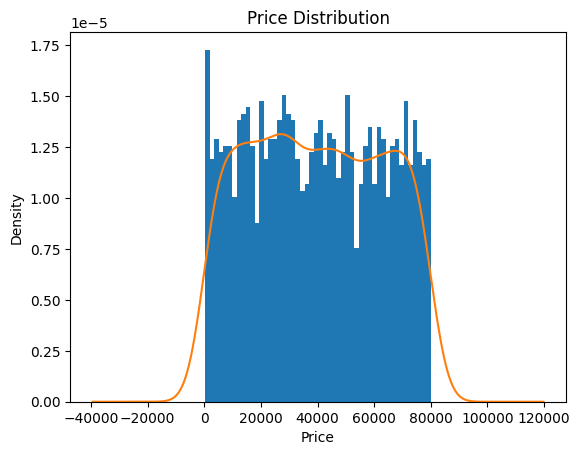

In [ ]:
plt.hist(df['actual_price'], bins=50, density=True)
df['actual_price'].plot(kind='kde')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()


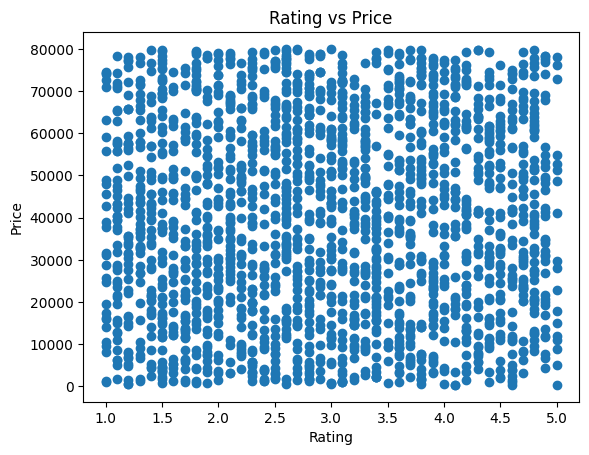

In [ ]:
plt.scatter(df['rating'], df['actual_price'])
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Rating vs Price")
plt.show()


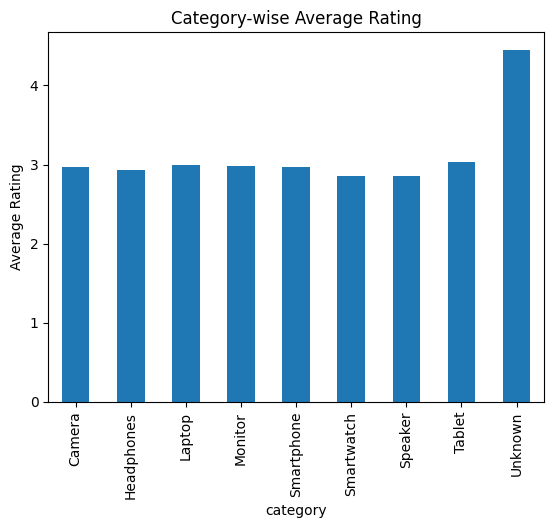

In [ ]:
cat_avg = df.groupby('category')['rating'].mean()
cat_avg.head(20).plot(kind='bar')   # show only first 20 for clarity
plt.title("Category-wise Average Rating")
plt.ylabel("Average Rating")
plt.show()


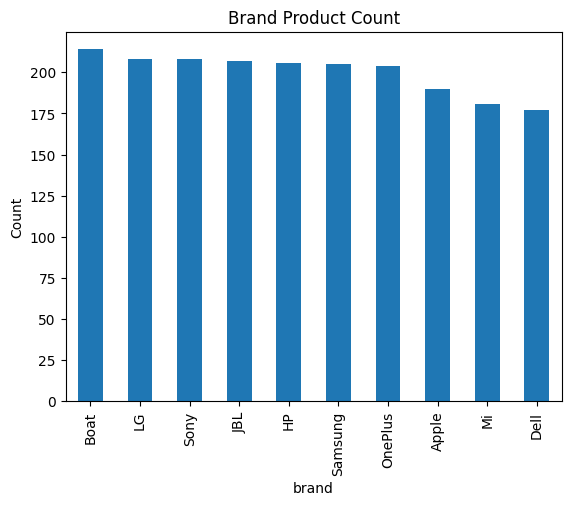

In [ ]:
brand_count = df['brand'].value_counts().head(20)   # top 20 brands
brand_count.plot(kind='bar')
plt.title("Brand Product Count")
plt.ylabel("Count")
plt.show()


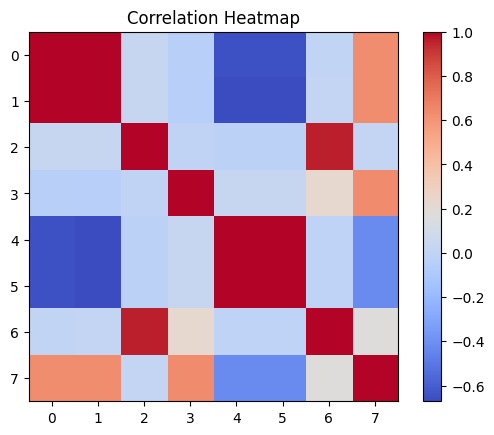

In [ ]:
num_df = df.select_dtypes(include=['int64','float64'])
plt.imshow(num_df.corr(), cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.to_csv("Amazonupdated_price_data.csv", index=False)

In [ ]:
from google.colab import files
files.download("Amazonupdated_price_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
verify_df = pd.read_csv("Amazonupdated_price_data.csv")
verify_df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percentage,discount_percent,price_category,popularity_score,revenue_potential
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,6.608957,Premium,19.924860,1.487259e+08
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,4.184451,Premium,22.795289,6.088180e+08
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,8.988944,Premium,14.879318,1.097362e+08
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,7.145786,Premium,36.156019,1.111732e+09
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,8.546644,Premium,46.858883,7.003591e+08


EDA TITATIC

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape


(891, 15)

In [ ]:
print("data info",df.info())
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
data info None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [ ]:
#handling missining values
#fill the numeric missing with mean
df['age']=df['age'].fillna(df['age'].mean())
#fill categorical missing with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.drop(columns=['deck'],inplace=True)
print("Missing values after cleaning:\n",df.isnull().sum().sum())


Missing values after cleaning:
 2


In [ ]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


In [ ]:
#Duplicates & Data type check

print("Duplicted rows:",df.duplicated().sum())

df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()

Duplicted rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


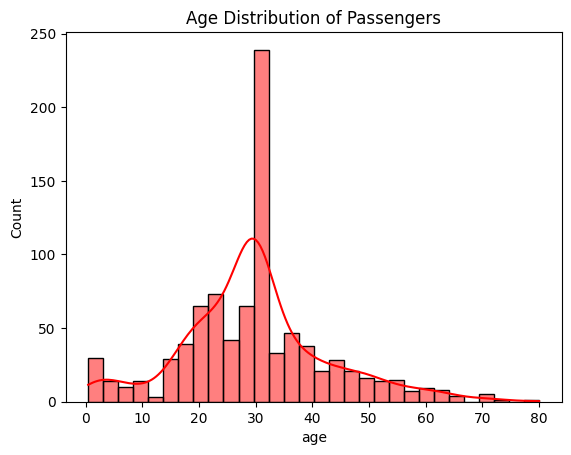

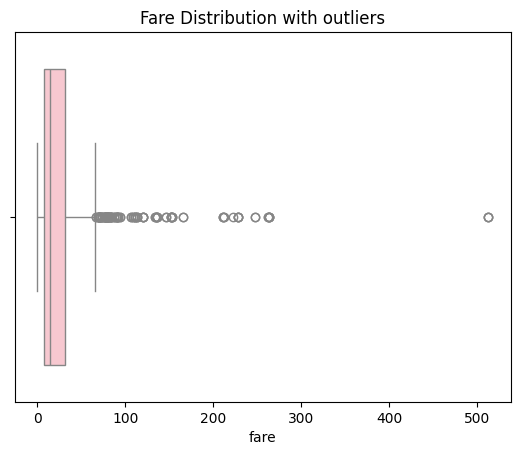

In [ ]:
# univariate analysis numeric features
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#Histogram:age
sns.histplot(df['age'],bins=30,kde=True,color='red')
plt.title("Age Distribution of Passengers")
plt.show()

#Boxplot : Fare
sns.boxplot(x=df['fare'],color='pink')
plt.title("Fare Distribution with outliers")
plt.show()

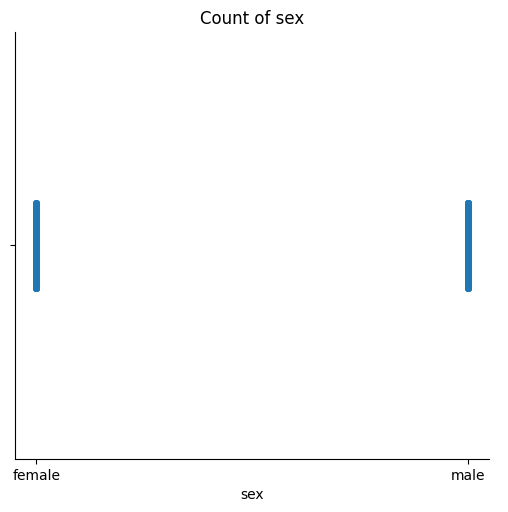

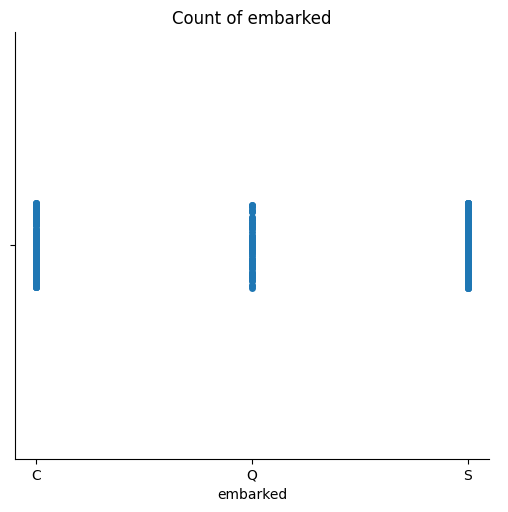

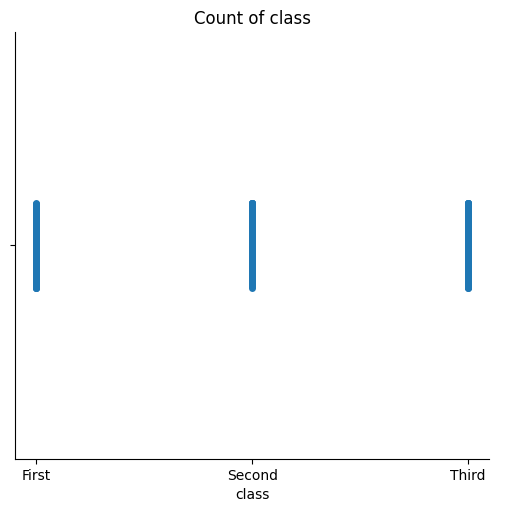

In [ ]:
#univariate analysis categorical features
cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
  sns.catplot(x=col,data=df)
  plt.title(f"Count of {col}")
  plt.show()

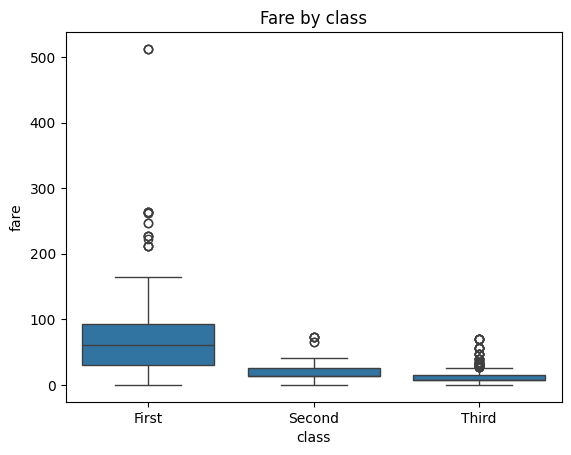

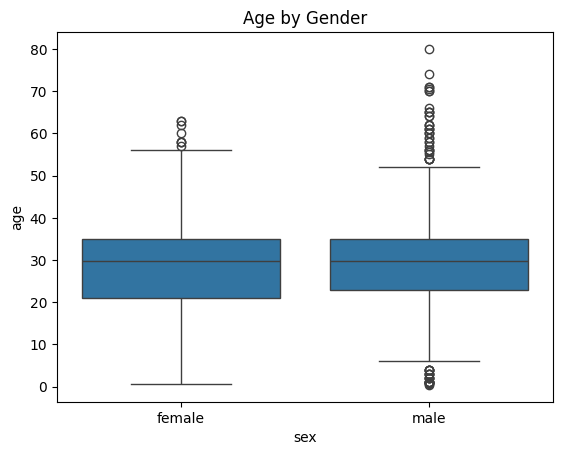

In [ ]:
#Bivariate Analysis Numerical vs Categorical
sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()
sns.boxplot(x='sex',y='age',data=df)
plt.title("Age by Gender")
plt.show()

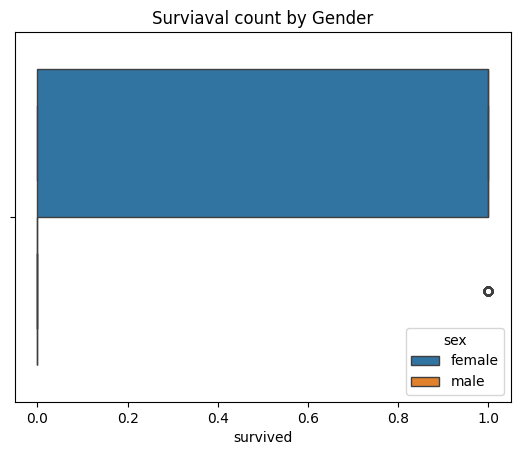

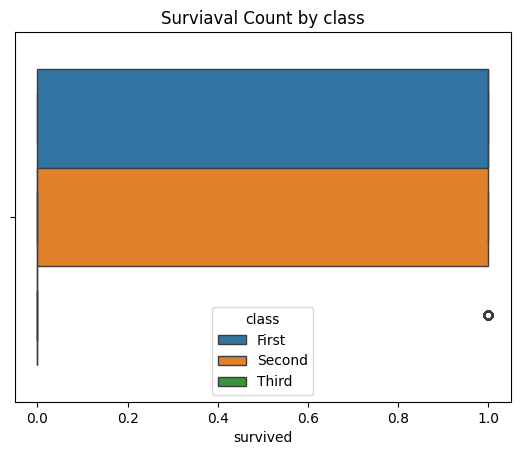

In [ ]:
#Bivariate Analysis - Categorical vs Categorical

sns.boxplot(x='survived',hue='sex',data=df)
plt.title("Surviaval count by Gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("Surviaval Count by class")
plt.show()

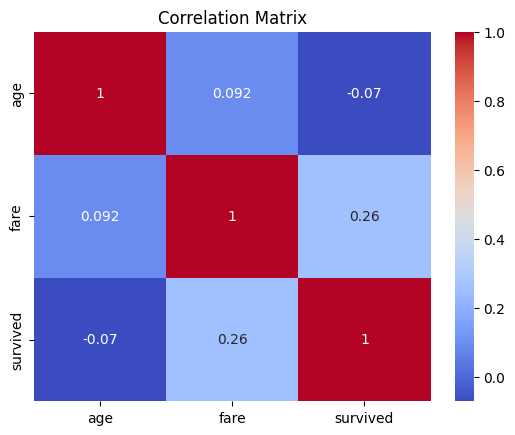

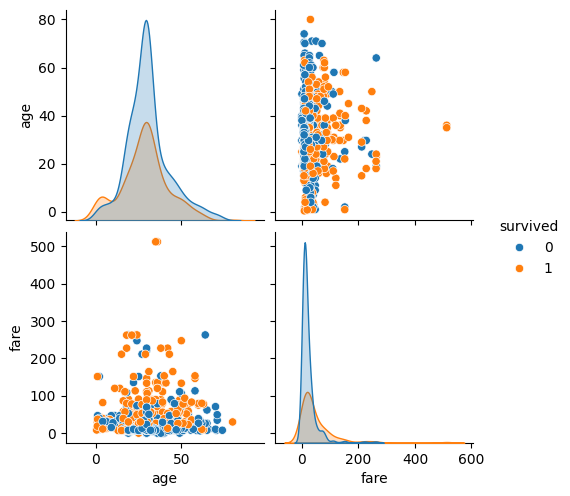

In [ ]:
#Corelation and multivariate analysis

corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Number of outliers in fare: 116


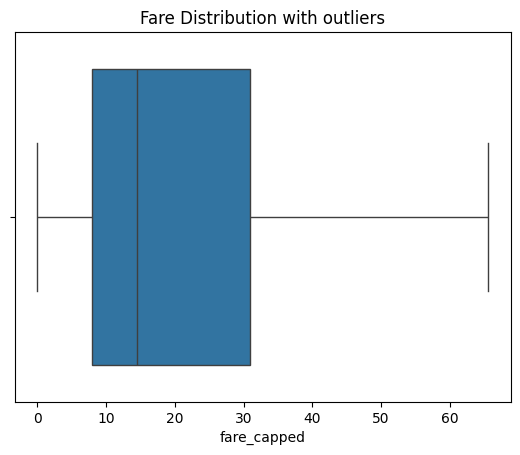

In [ ]:
#outliers dection using iqr

Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outliers=df[(df['fare']<lower) | (df['fare'] > upper)]
print("Number of outliers in fare:",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare Distribution with outliers")
plt.show()

In [ ]:
import pandas as pd


features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("✔ Loaded: features, stores, train, test\n")

# 2. MERGE DATASETS (TRAIN DATA)


# Merge train + stores
df = pd.merge(train, stores, on="Store", how="left")

# Merge with features on Store & Date
df = pd.merge(df, features, on=["Store", "Date"], how="left")

print("✔ TRAIN merged successfully\n")

# 3. DISPLAY FIRST & LAST 10 ROWS


print("FIRST 10 ROWS:")
display(df.head(10))

print("\nLAST 10 ROWS:")
display(df.tail(10))


# 4. PRINT SHAPE, INFO, DESCRIBE


print("\nDATAFRAME SHAPE:", df.shape)

print("\nDATAFRAME INFO:")
df.info()

print("\nDESCRIBE (Numerical Stats):")
display(df.describe())


# 5. IDENTIFY COLUMN TYPES


# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
date_cols = df.select_dtypes(include=['datetime']).columns.tolist()

print("\nNUMERICAL COLUMNS:")
print(num_cols)

print("\nCATEGORICAL COLUMNS:")
print(cat_cols)

print("\nDATE COLUMNS:")
print(date_cols)


# 6. UNIQUE STORE TYPES & DEPARTMENTS


print("\nUNIQUE STORE TYPES:")
print(df["Type"].unique())

print("\nUNIQUE DEPARTMENTS:")
print(df["Dept"].unique())


# 7. COLUMNS THAT NEED CLEANING


print("\nMISSING VALUES:")
print(df.isnull().sum())

print("\nDATA TYPES:")
print(df.dtypes)


✔ Loaded: features, stores, train, test

✔ TRAIN merged successfully

FIRST 10 ROWS:


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False



LAST 10 ROWS:


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
421560,45,98,2012-08-24,415.40,False,B,118221,72.62,3.834,7936.20,58.38,22.00,5518.07,2291.97,191.344887,8.684,False
421561,45,98,2012-08-31,346.04,False,B,118221,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False
421562,45,98,2012-09-07,352.44,True,B,118221,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,True
421563,45,98,2012-09-14,605.96,False,B,118221,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,191.699850,8.684,False
421564,45,98,2012-09-21,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684,False
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False



DATAFRAME SHAPE: (421570, 17)

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtype

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000



NUMERICAL COLUMNS:
['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

CATEGORICAL COLUMNS:
['Type']

DATE COLUMNS:
['Date']

UNIQUE STORE TYPES:
['A' 'B' 'C']

UNIQUE DEPARTMENTS:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]

MISSING VALUES:
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

DATA TYPES:
Store                    int

TASK 2

In [ ]:
import pandas as pd


# 1. Identify missing values

print("Missing values before cleaning:\n")
print(df.isnull().sum())


# 2. Fill missing NUMERIC values using MEDIAN

num_cols_median = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for col in num_cols_median:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


# 3. Fill missing MARKDOWN fields using MEAN

markdown_cols = [col for col in df.columns if "MarkDown" in col]

for col in markdown_cols:
    df[col] = df[col].fillna(df[col].mean())


# 4. Convert Date column to datetime

df['Date'] = pd.to_datetime(df['Date'])


# 5. Remove duplicate rows

df = df.drop_duplicates()


# 6. Reset index after cleaning

df = df.reset_index(drop=True)


# 7. Show missing values after cleaning

print("\nMissing values AFTER cleaning:\n")
print(df.isnull().sum())



Missing values before cleaning:

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

Missing values AFTER cleaning:

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64


TASK 3


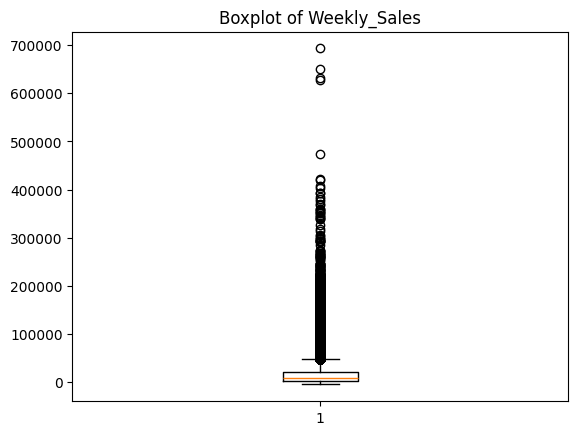

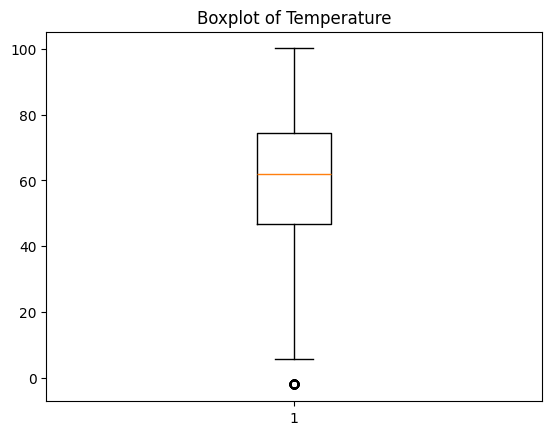

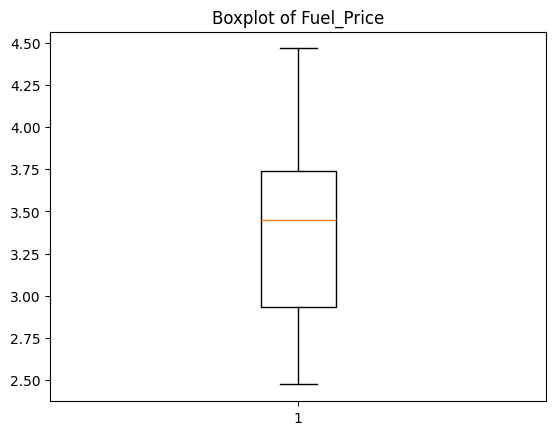

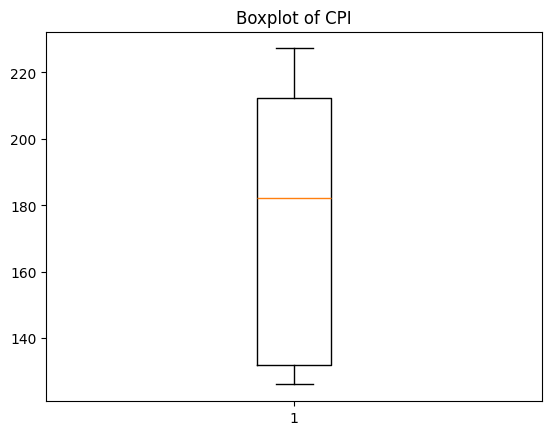

Weekly_Sales: Lower=-25109.653749999998, Upper=47395.15625
Temperature: Lower=5.279999999999994, Upper=115.68
Fuel_Price: Lower=1.7254999999999996, Upper=4.9455
CPI: Lower=11.431177550000001, Upper=333.00848195000003

Holiday Week Sales Summary:
count     29661.000000
mean      17035.823187
std       27222.000409
min        -798.000000
25%        2078.540000
50%        7947.740000
75%       21189.250000
max      693099.360000
Name: Weekly_Sales, dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# BOX PLOTS
cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI']

for c in cols:
    plt.boxplot(df[c].dropna())
    plt.title(f"Boxplot of {c}")
    plt.show()

# IQR METHOD
def iqr_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

for c in cols:
    low, high = iqr_outliers(c)
    print(f"{c}: Lower={low}, Upper={high}")

# Holiday Sales Spikes
holiday_spikes = df[df['IsHoliday_x'] == True]['Weekly_Sales'] # Changed 'IsHoliday' to 'IsHoliday_x'
print("\nHoliday Week Sales Summary:")
print(holiday_spikes.describe())

# OUTLIER TREATMENT

low, high = iqr_outliers('Weekly_Sales')
df['Weekly_Sales_capped'] = np.where(df['Weekly_Sales'] > high, high,
                             np.where(df['Weekly_Sales'] < low, low,
                                      df['Weekly_Sales']))

TASK 4


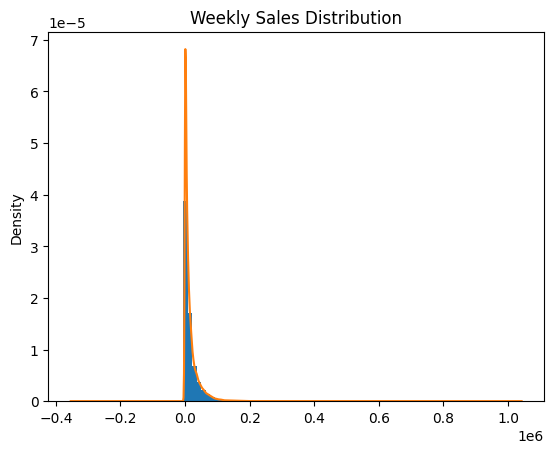

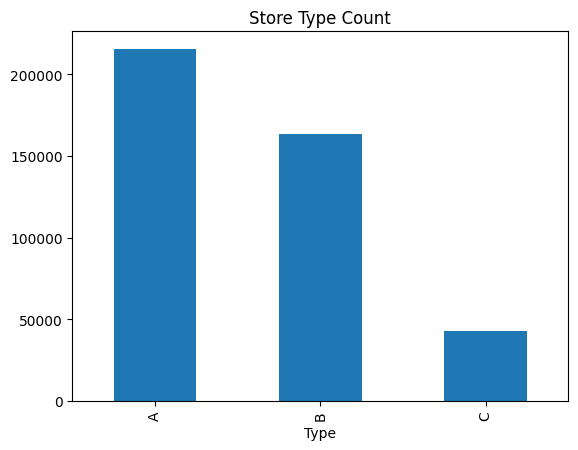

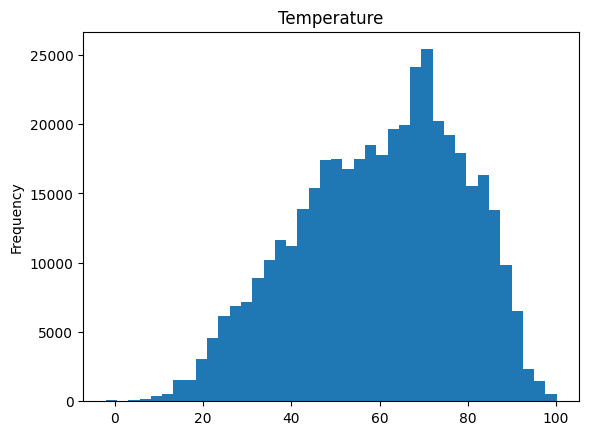

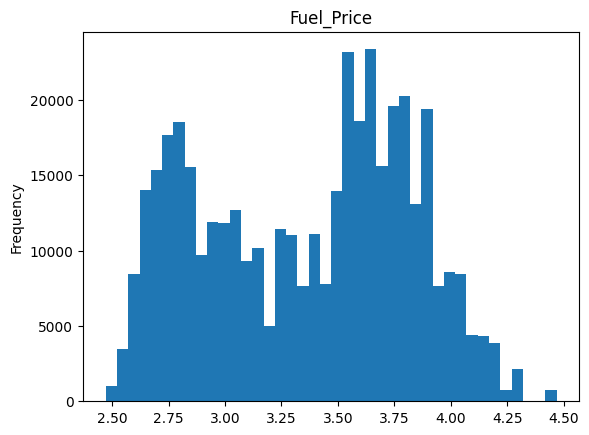

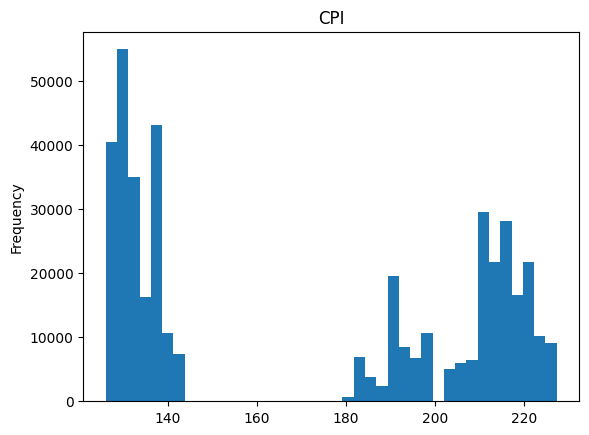

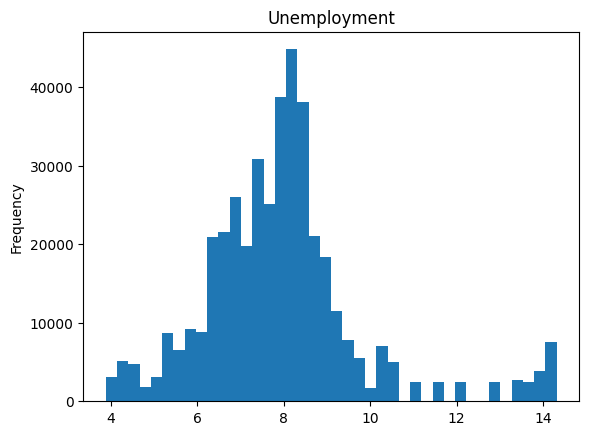

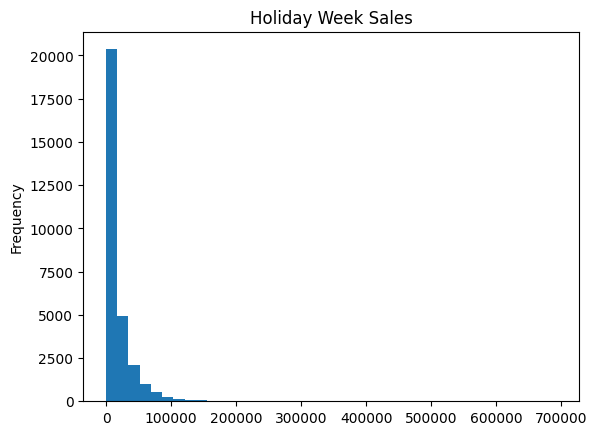

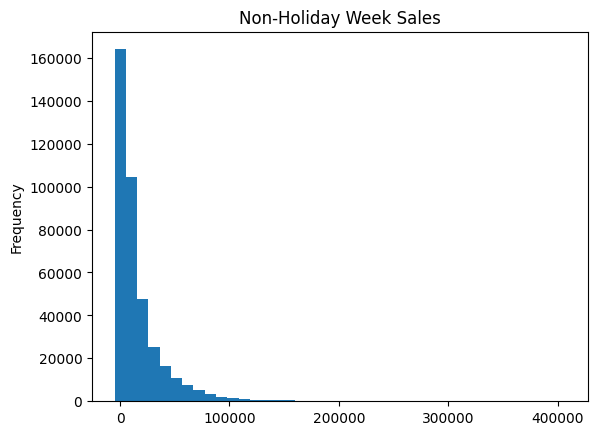

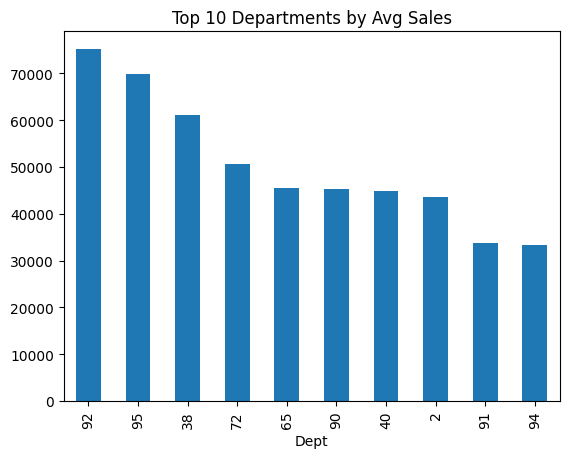

In [ ]:
#  Weekly Sales Distribution
plt.hist(df['Weekly_Sales'], bins=50, density=True)
df['Weekly_Sales'].plot(kind='kde')
plt.title("Weekly Sales Distribution")
plt.show()

# Store Type Distribution
df['Type'].value_counts().plot(kind='bar', title="Store Type Count")
plt.show()

#  Numeric Distributions
for c in ['Temperature','Fuel_Price','CPI','Unemployment']:
    df[c].plot(kind='hist', bins=40, title=c)
    plt.show()

# Holiday vs Non-Holiday Sales
df[df['IsHoliday_x']==True]['Weekly_Sales'].plot(kind='hist', bins=40, title="Holiday Week Sales")
plt.show()

df[df['IsHoliday_x']==False]['Weekly_Sales'].plot(kind='hist', bins=40, title="Non-Holiday Week Sales")
plt.show()

# Top 10 Departments
dept_sales = df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
dept_sales.plot(kind='bar', title="Top 10 Departments by Avg Sales")
plt.show()


TASK 5

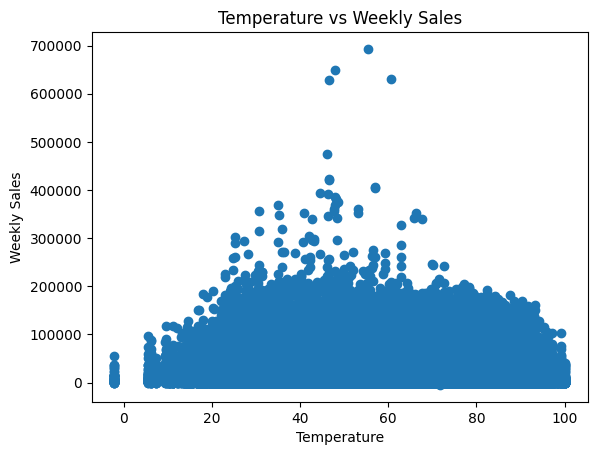

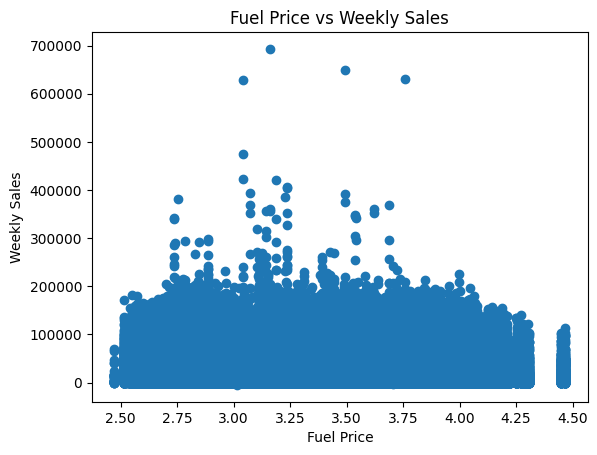

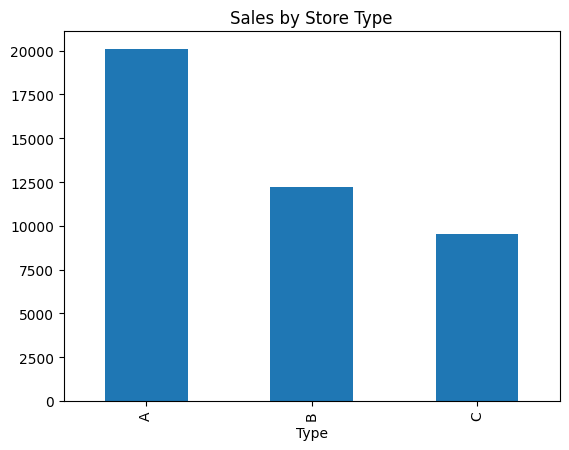

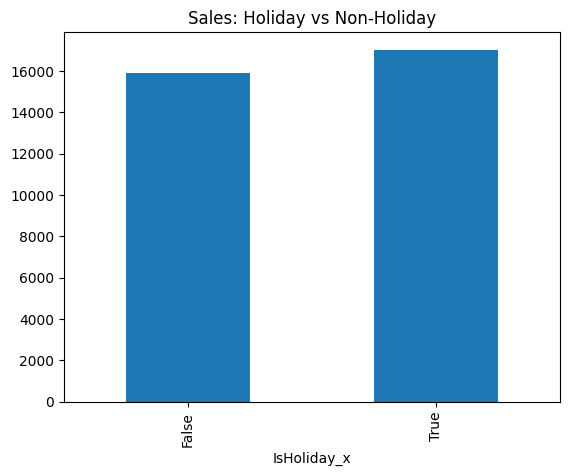

Top Store: 20
Lowest Store: 5


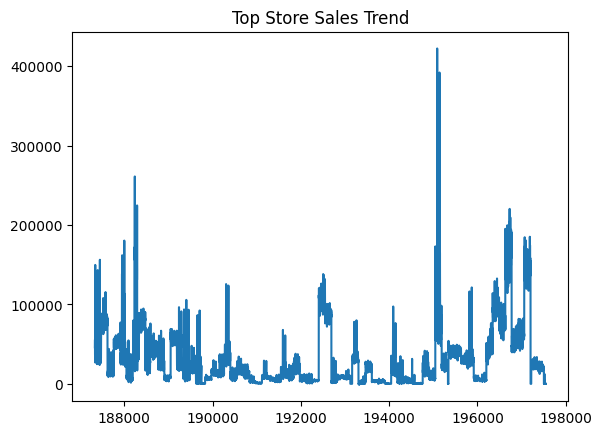

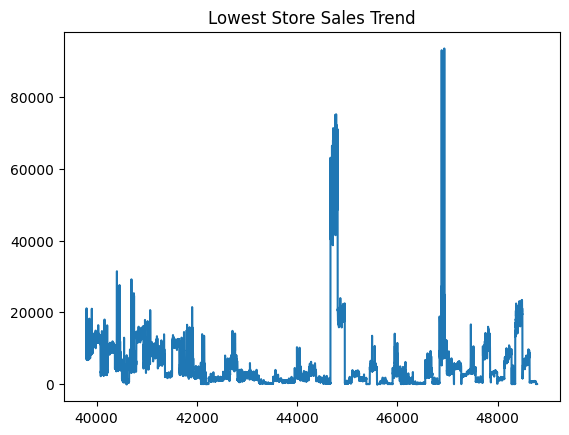

In [ ]:
# Scatter: Temp vs Weekly Sales
plt.scatter(df['Temperature'], df['Weekly_Sales'])
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

#Scatter: Fuel Price vs Weekly Sales
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'])
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()

# Weekly Sales vs Store Type
df.groupby('Type')['Weekly_Sales'].mean().plot(kind='bar', title="Sales by Store Type")
plt.show()

#  Weekly Sales vs Holiday Flag
df.groupby('IsHoliday_x')['Weekly_Sales'].mean().plot(kind='bar', title="Sales: Holiday vs Non-Holiday")
plt.show()

#Top vs Lowest Performing Store
store_avg = df.groupby('Store')['Weekly_Sales'].mean()
top_store = store_avg.idxmax()
low_store = store_avg.idxmin()

print("Top Store:", top_store)
print("Lowest Store:", low_store)

df[df['Store']==top_store]['Weekly_Sales'].plot(title="Top Store Sales Trend")
plt.show()

df[df['Store']==low_store]['Weekly_Sales'].plot(title="Lowest Store Sales Trend")
plt.show()

TASK 6

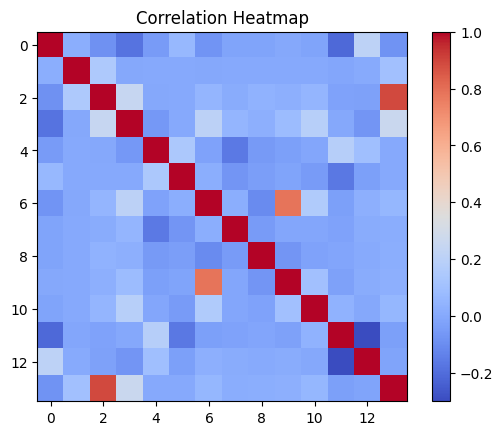

,Weekly_Sales,Size
Store,,
1,21710.543621,151315.0
2,26898.070031,202307.0
3,6373.033983,37392.0
4,29161.210415,205863.0
5,5053.415813,34875.0


,Weekly_Sales,IsHoliday_x,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,24924.50,False,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
1,46039.49,True,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
2,41595.55,False,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
3,19403.54,False,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
4,21827.90,False,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079


In [ ]:
#  Correlation Heatmap
num = df.select_dtypes(include=['float64','int64'])
plt.imshow(num.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.colorbar()
plt.show()

#  Store Level Sales
store_data = df.groupby('Store')[['Weekly_Sales','Size']].mean()
display(store_data.head())

#  Weekly Sales vs Temperature vs Holiday
df.groupby(['Temperature','IsHoliday_x'])['Weekly_Sales'].mean().head()

#  Markdown Influence
markdown_cols = [c for c in df.columns if "MarkDown" in c]
df[['Weekly_Sales','IsHoliday_x'] + markdown_cols].head()


TASK 7

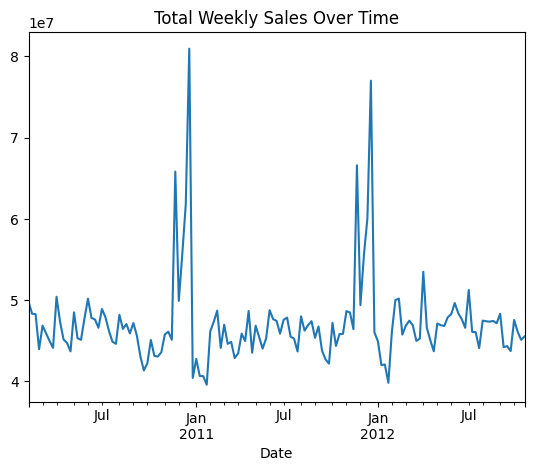

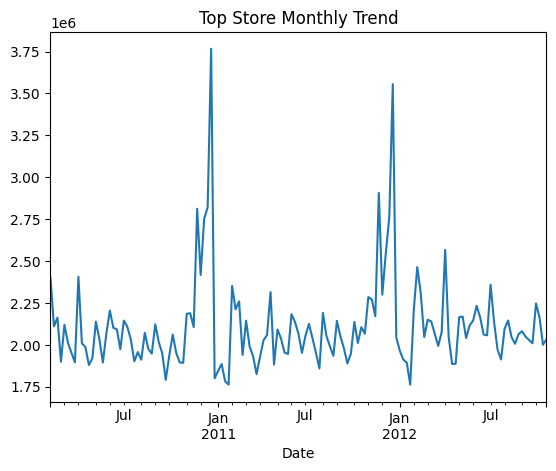

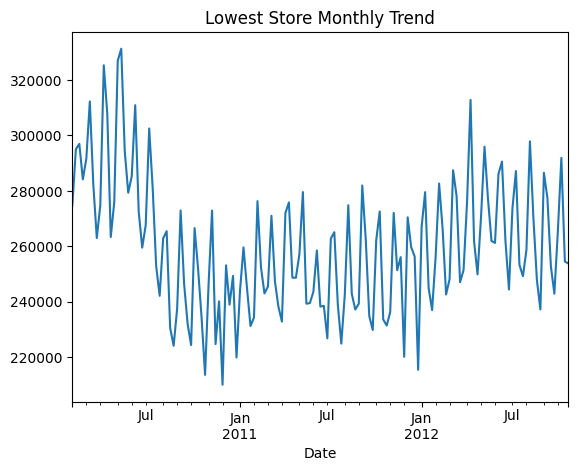

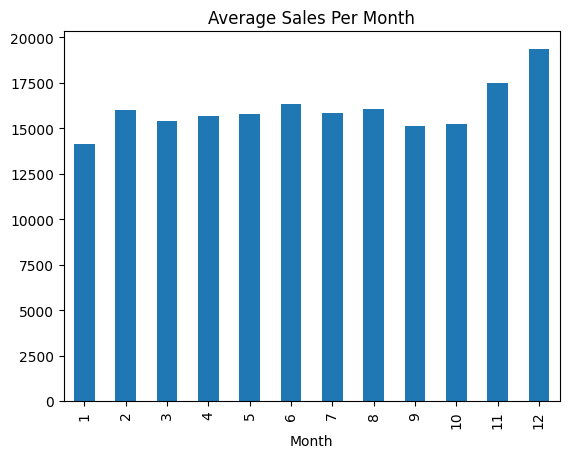

Dept  Month
1     1        13665.363194
      2        23439.498833
      3        18478.219556
      4        27969.288698
      5        14168.030111
Name: Weekly_Sales, dtype: float64

In [ ]:
# Date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Total weekly sales over time
df.groupby('Date')['Weekly_Sales'].sum().plot(title="Total Weekly Sales Over Time")
plt.show()

# Store with highest and lowest sales
store_avg = df.groupby('Store')['Weekly_Sales'].sum()
top_store = store_avg.idxmax()
low_store = store_avg.idxmin()

df[df['Store']==top_store].groupby('Date')['Weekly_Sales'].sum().plot(title="Top Store Monthly Trend")
plt.show()

df[df['Store']==low_store].groupby('Date')['Weekly_Sales'].sum().plot(title="Lowest Store Monthly Trend")
plt.show()

# Seasonal Analysis
monthly = df.groupby('Month')['Weekly_Sales'].mean()
monthly.plot(kind='bar', title="Average Sales Per Month")
plt.show()

dept_month = df.groupby(['Dept','Month'])['Weekly_Sales'].mean()
display(dept_month.head())


TASK 8A


In [ ]:
# Year, Month, Week already created
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week

# Discount effect
markdown_cols = [c for c in df.columns if "MarkDown" in c]
df['discount_effect'] = df[markdown_cols].sum(axis=1)

# Peak season (Nov, Dec)
df['is_peak_season'] = df['month'].isin([11,12])

# Normalized Sales
df['normalized_sales'] = df['Weekly_Sales'] / df['Size']


TASK 8B

In [ ]:
# Peak season & high sales
peak_sales = df[(df['is_peak_season']==True) & (df['Weekly_Sales'] > 50000)]
print(len(peak_sales))

# Top 10% stores by normalized sales
threshold = df['normalized_sales'].quantile(0.90)
top10_norm = df[df['normalized_sales'] >= threshold]

# Departments with discount above median
df[df['discount_effect'] > df['discount_effect'].median()]

# Multiple conditions filter
filtered = df[
    (df['Temperature'] < 40) &
    (df['Fuel_Price'] > 3.5) &
    (df['Weekly_Sales'].between(20000,60000)) &
    (df['is_peak_season']==True)
]
display(filtered.head())


5071


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Weekly_Sales_capped,Year,Month,Week,year,month,week,discount_effect,is_peak_season,normalized_sales
59234,7,2,2011-11-04,21320.52,False,B,70713,23.41,3.527,7246.420196,...,21320.52,2011,11,44,2011,11,44,20032.613536,True,0.301508
60235,7,9,2011-11-04,28969.99,False,B,70713,23.41,3.527,7246.420196,...,28969.99,2011,11,44,2011,11,44,20032.613536,True,0.409684
60378,7,10,2011-11-04,28281.31,False,B,70713,23.41,3.527,7246.420196,...,28281.31,2011,11,44,2011,11,44,20032.613536,True,0.399945
60379,7,10,2011-11-11,23758.50,False,B,70713,19.53,3.505,3307.600000,...,23758.50,2011,11,45,2011,11,45,7893.520000,True,0.335985
60522,7,11,2011-11-11,20611.14,False,B,70713,19.53,3.505,3307.600000,...,20611.14,2011,11,45,2011,11,45,7893.520000,True,0.291476


TASK 8C

In [ ]:
# Monthly average sales per store
monthly_store_sales = df.groupby(['Store','month'])['Weekly_Sales'].mean()
display(monthly_store_sales.head())

# Total discount per department
dept_discount = df.groupby('Dept')['discount_effect'].sum().sort_values(ascending=False)
display(dept_discount.head())

# Department with highest normalized sales
dept_norm = df.groupby('Dept')['normalized_sales'].mean().sort_values(ascending=False)
print("Top Dept:", dept_norm.head(1))

# Revenue potential per store
df['revenue_potential'] = df['Weekly_Sales'] * 52
top10_revenue = df.groupby('Store')['revenue_potential'].sum().sort_values(ascending=False).head(10)
display(top10_revenue)


Store  month
1      1        19586.960647
       2        22497.470104
       3        21750.978506
       4        21601.538801
       5        21669.008080
Name: Weekly_Sales, dtype: float64

,discount_effect
Dept,
1,1.270458e+08
2,1.270458e+08
3,1.270458e+08
4,1.270458e+08
7,1.270458e+08


Top Dept: Dept
92    0.641547
Name: normalized_sales, dtype: float64


,revenue_potential
Store,
20,1.567269e+10
4,1.557629e+10
14,1.502800e+10
13,1.489892e+10
2,1.431989e+10
10,1.412412e+10
27,1.320051e+10
6,1.163532e+10
1,1.156495e+10
